### Importing Necessary Libraries

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif,SelectKBest


df = pd.read_csv("C:/Users/Asus/Downloads/ineu/heart.csv")
df = pd.DataFrame(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
df['target'].value_counts().unique

<bound method Series.unique of target
1    526
0    499
Name: count, dtype: int64>

*  Distribution of 0 and 1 of target variable is nearly equal so additional sampling method not required 

### Data Preprocessing

In [15]:
print(df.isnull().sum())
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
df['oldpeak'] = df['oldpeak'].astype(dtype='int64') #converting from float64 to int64 

<Axes: >

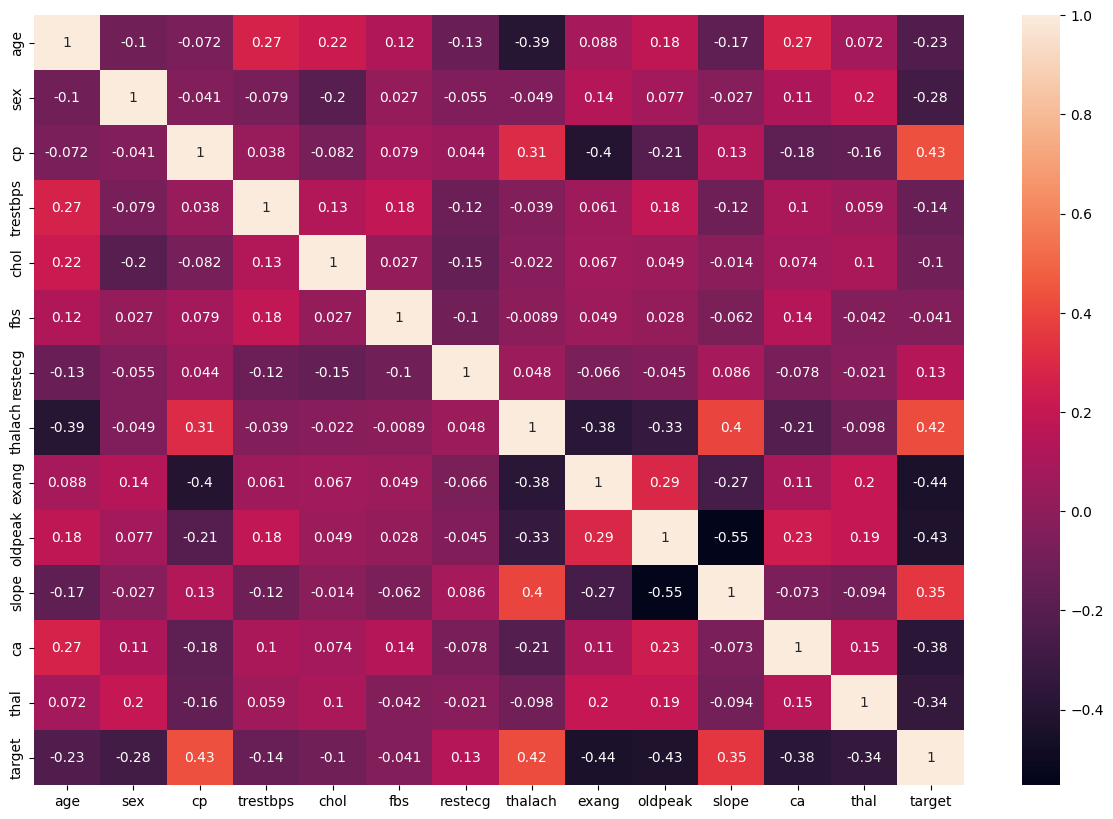

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

from Observation it can be noted that 'target' has highest positive correlation with cp,slope and thalach , it also has highest negative correlation with oldpeak and exang

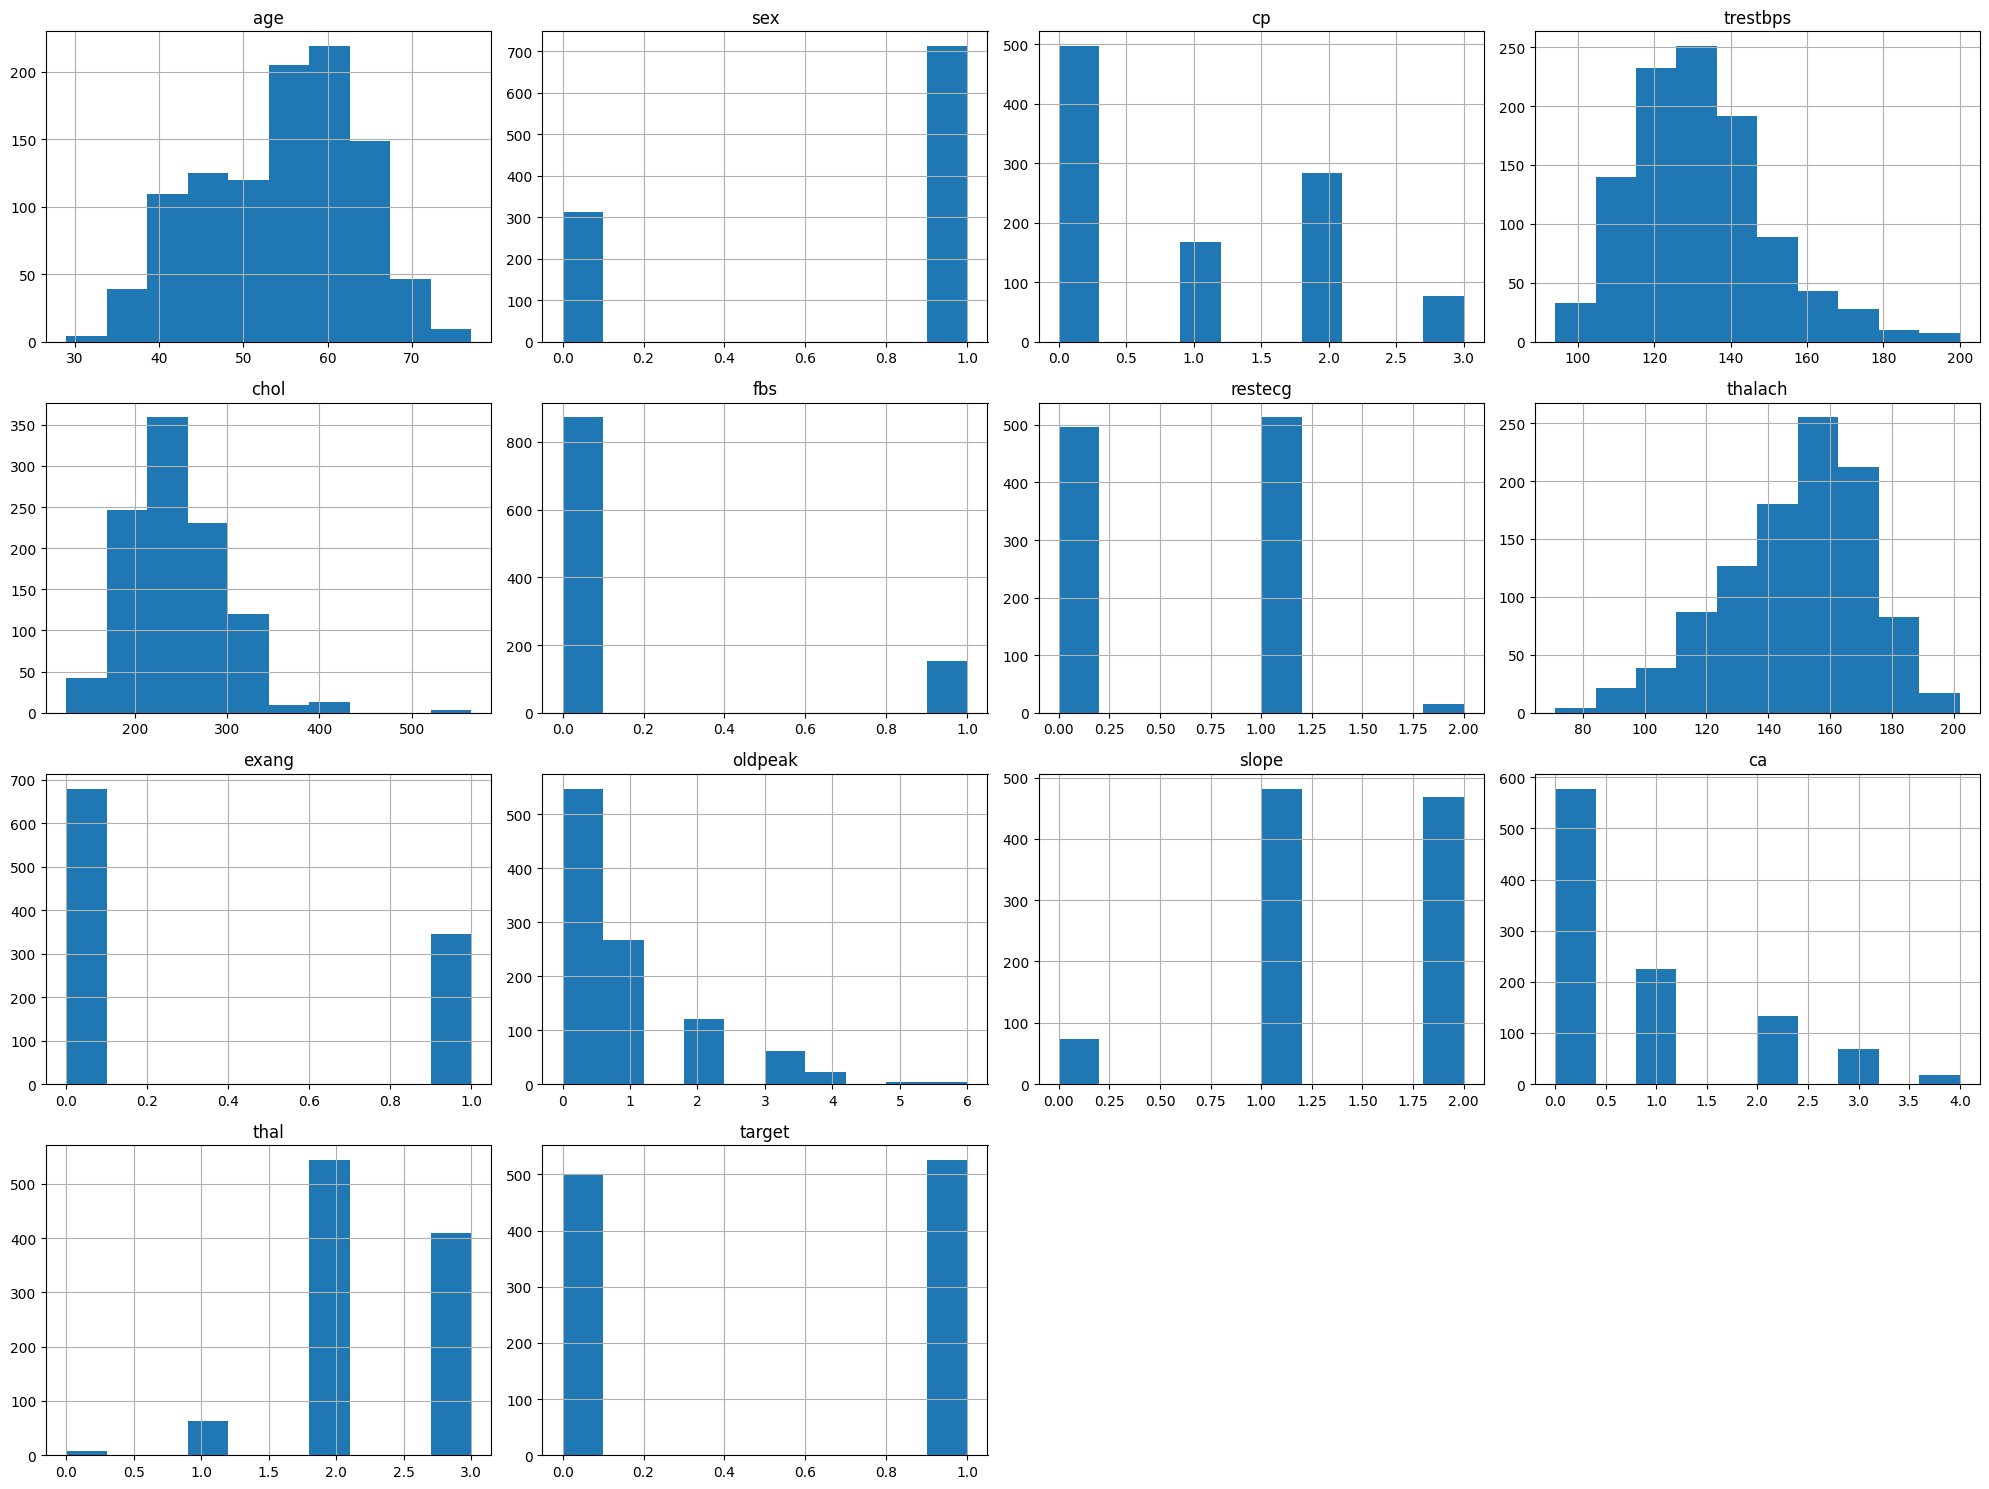

In [20]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

**Total Features - 13**

**Categorical Features(8)**- Sex, Cp, Fbs, restecg, exang, slope,ca, thal

**Quantitative Features(5)**- Age, Trestbps, chol, thalach, oldpeak

* Checking for Outliers

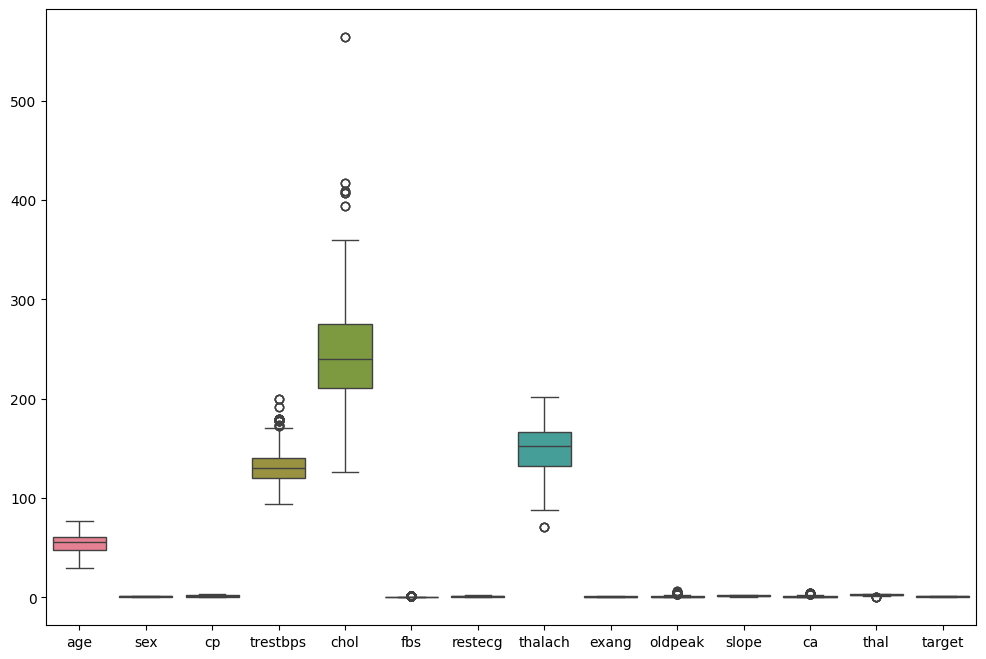

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

<Axes: >

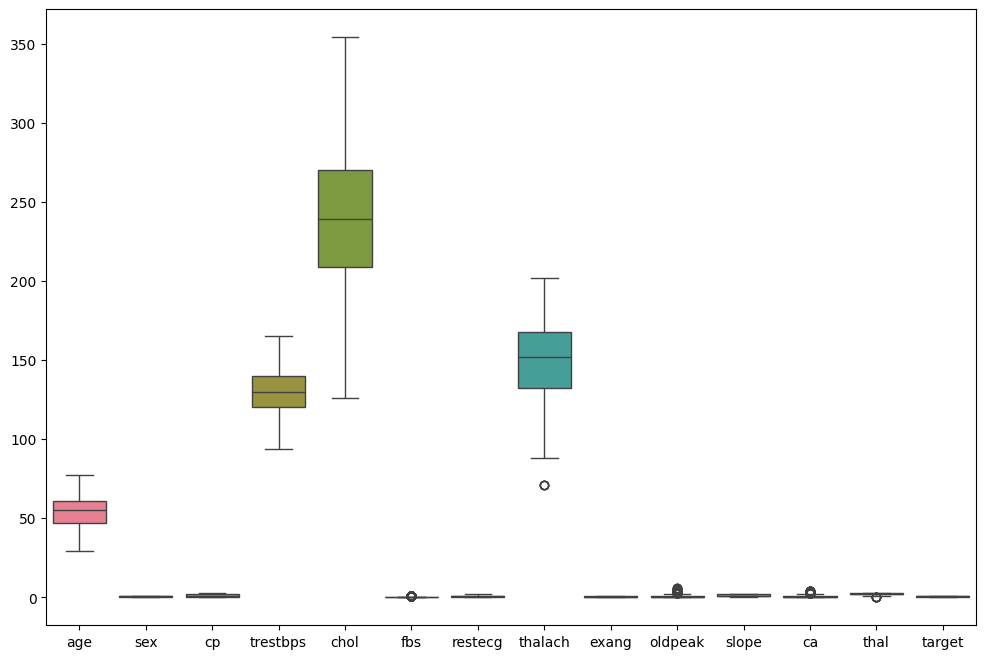

In [22]:
df = df[df['trestbps']<170]
df = df[df['chol']<360]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)

* It is observed no significant amount Outliers are present

* Visualizing Age Groups

In [23]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.02809573361082


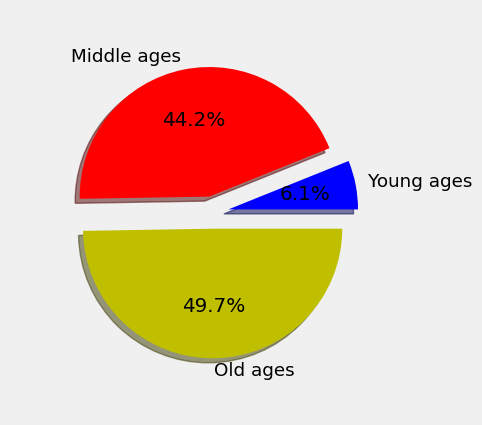

In [24]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Old = df[(df.age>55)]
plt.style.use('fivethirtyeight')
colors = ['b','r','y']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['Young ages','Middle ages','Old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%',radius=0.8)
plt.show()

In [25]:
X=df.drop('target',axis=1)
y=df['target']

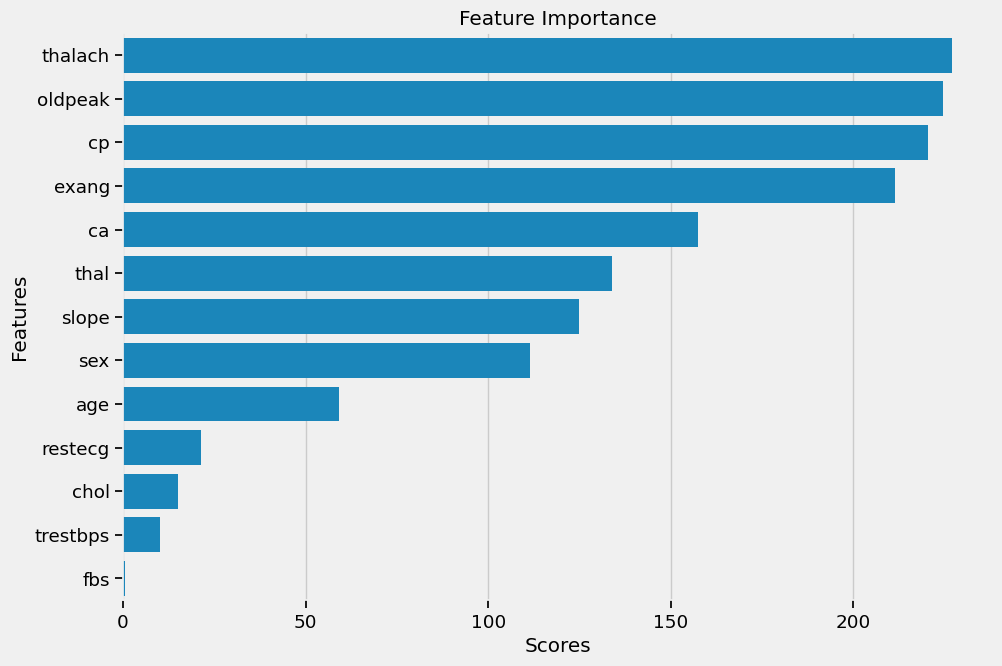

In [26]:
selector=SelectKBest(f_classif,k=13)
X_select=selector.fit_transform(X,y)

selected_features=X.columns[selector.get_support()]
feature_score=selector.scores_[selector.get_support()]
feature_score_df=pd.DataFrame({'Features':selected_features,'Scores':feature_score})
feature_score_df=feature_score_df.sort_values(by='Scores',ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x='Scores',y='Features',data=feature_score_df)
plt.title('Feature Importance')
plt.show()

* higher fvalue has stronger relation with target 
* such higher values from cp,thalach, exang, oldpeak, slope, ca, thal are significant features

In [14]:
X=X.drop(['fbs','trestbps','chol','restecg'],axis=1)
X

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,168,0,1,2,2,3
1,53,1,0,155,1,3,0,0,3
2,70,1,0,125,1,2,0,0,3
3,61,1,0,161,0,0,2,1,3
4,62,0,0,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...
1020,59,1,1,164,1,0,2,0,2
1021,60,1,0,141,1,2,1,1,3
1022,47,1,0,118,1,1,1,1,2
1023,50,0,0,159,0,0,2,0,2


* Standardizing the data

In [15]:
stds=StandardScaler()
columns_to_scale=['age','sex','cp','thal','exang','thalach','slope','ca','oldpeak']
X[columns_to_scale]=stds.fit_transform(X[columns_to_scale])
X.head()


,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,0.821321,-0.712287,0.187950,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.255968,1.403928,2.031475,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,-1.048692,1.403928,1.109712,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.516900,-0.712287,-0.733813,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,-1.874977,-0.712287,0.187950,-0.624121,2.179817,-0.522122


<Axes: >

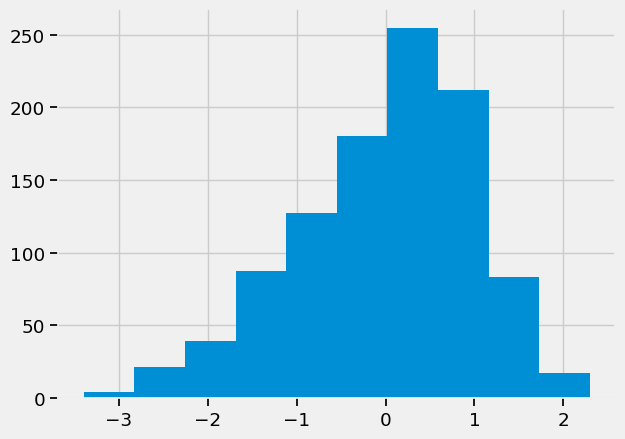

In [16]:
X.thalach.hist()


### Model Implementation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
duplicate_rows = X[X.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows.value_counts())


Duplicate rows:
age        sex        cp         thalach    exang      oldpeak    slope      ca         thal     
-1.812350   0.661504   1.027618   1.038764  -0.712287  -0.733813   0.995433   3.150413  -0.522122    7
-1.591791   0.661504  -0.915755  -1.527067   1.403928   1.109712  -0.624121  -0.731971   1.089852    3
                                  1.386673  -0.712287  -0.733813   0.995433  -0.731971   1.089852    3
 1.716595   0.661504  -0.915755  -1.744511  -0.712287   1.109712  -0.624121   2.179817  -0.522122    3
                                 -1.048692   1.403928   1.109712  -2.243675  -0.731971   1.089852    3
                                                                                                    ..
-1.591791   0.661504   1.999305   1.256207   1.403928   0.187950   0.995433  -0.731971   1.089852    2
-1.481512  -1.511706   0.055931   0.603877  -0.712287  -0.733813   0.995433  -0.731971  -0.522122    2
                                  0.821321  -0.712287  -0.733

* I have decided to use cross validation as 10 because certain duplicate rows are present so that the model does not train on same data 

In [28]:
from sklearn.linear_model import LogisticRegression
param_grid1 = {'C': np.logspace(-4, 4, 20),
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}
logistic = LogisticRegression()
grid1 = GridSearchCV(logistic, param_grid1, cv=10, scoring='accuracy')
grid1.fit(X_train, y_train)
print("Logistic Regression")
print("Best Hyperparameters:", grid1.best_params_)
print("Best Accuracy:", grid1.best_score_)
print("Best Model:", grid1.best_estimator_)

Logistic Regression
Best Hyperparameters: {'C': np.float64(0.23357214690901212), 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.8478677621283255
Best Model: LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')


In [20]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid2 = {'n_estimators': [50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]}
et = ExtraTreesClassifier()
grid2 = GridSearchCV(et, param_grid2, cv=10, scoring='accuracy')
grid2.fit(X_train,y_train)

print("\n Extra Trees ")
print("Best Hyperparameters:", grid2.best_params_)
print("Best Accuracy:", grid2.best_score_)
print("Best Model:", grid2.best_estimator_)


 Extra Trees 
Best Hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}
Best Accuracy: 0.9874217527386542
Best Model: ExtraTreesClassifier(criterion='entropy', max_features='log2', n_estimators=50)


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

In [21]:
param_grid3 = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()
grid3 = GridSearchCV(estimator=gnb, param_grid=param_grid3, cv=10, scoring='accuracy')
grid3.fit(X_train,y_train)

print("\nGaussian NB")
print("Best Hyperparameters:", grid3.best_params_)
print("Best Accuracy:", grid3.best_score_)

print("Best Model:", grid3.best_estimator_)


Gaussian NB
Best Hyperparameters: {'var_smoothing': np.float64(0.3511191734215131)}
Best Accuracy: 0.8492957746478872
Best Model: GaussianNB(var_smoothing=np.float64(0.3511191734215131))


In [22]:
from sklearn.svm import SVC
param_grid4 = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc = SVC()
grid5 = GridSearchCV(svc, param_grid4, cv=10, scoring='accuracy')
grid5.fit(X_train,y_train)

print("\nSVC")
print("Best Hyperparameters:", grid5.best_params_)
print("Best Accuracy:", grid5.best_score_)
print("Best Model:", grid5.best_estimator_)



SVC
Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.9860133020344289
Best Model: SVC(C=100, gamma=1)


knn , decision tree and random forest were overfitting everytime so i left them out 

In [43]:
lr = LogisticRegression(C= 0.23357214, penalty= 'l2', solver= 'liblinear')
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

et = ExtraTreesClassifier(bootstrap= True, criterion= 'entropy', max_features= 'sqrt', n_estimators= 100)
et.fit(X_train, y_train)
y_pred2 = et.predict(X_test)
print("\nExtra Tree")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

gnb = GaussianNB(var_smoothing= 0.00065793)
gnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)
print("\nGaussian NB")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))


svc = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
svc.fit(X_train, y_train)
y_pred4 = svc.predict(X_test)
print("\nSVC")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("Classification Report:\n", classification_report(y_test, y_pred4))


Logistic Regression
Accuracy: 0.8116883116883117
Confusion Matrix:
 [[118  41]
 [ 17 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308


Extra Tree
Accuracy: 1.0
Confusion Matrix:
 [[159   0]
 [  0 149]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       149

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308


Gaussian NB
Accuracy: 0.8246753246753247
Confusion Matrix:
 [[123  36]
 [ 18 131]]
Classification Report:
               precision    rec

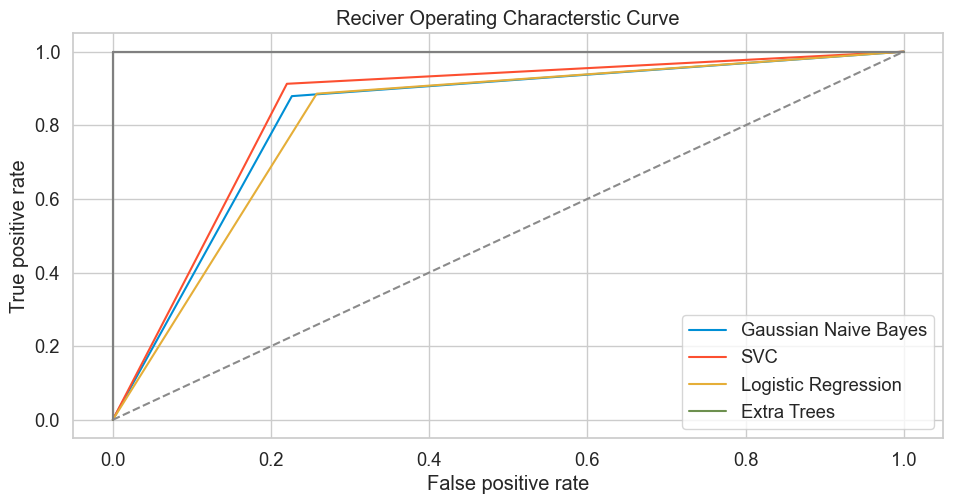

In [44]:
from sklearn.metrics import roc_curve
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred3)                                                        
svc_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,y_pred4)
lr_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred1)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred2)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Gaussian Naive Bayes')
plt.plot(svc_false_positive_rate,xgb_true_positive_rate,label='SVC')
plt.plot(lr_false_positive_rate,knn_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Extra Trees')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Overfitting Check

In [45]:
training_accuracy1=accuracy_score(y_train,lr.predict(X_train))
testing_accuracy1 = accuracy_score(y_test, y_pred1)
print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy1:.4f}")
print(f"Testing Accuracy: {testing_accuracy1:.4f}")

training_accuracy2 = accuracy_score(y_train,et.predict(X_train))
testing_accuracy2 = accuracy_score(y_test, y_pred2)
print("\n\nExtra Trees")
print(f"Training Accuracy: {training_accuracy2:.4f}")
print(f"Testing Accuracy: {testing_accuracy2:.4f}")

training_accuracy3 = accuracy_score(y_train,gnb.predict(X_train))
testing_accuracy3 = accuracy_score(y_test, y_pred3)
print("\n\nGaussian NB")
print(f"Training Accuracy: {training_accuracy3:.4f}")
print(f"Testing Accuracy: {testing_accuracy3:.4f}")

training_accuracy4 = accuracy_score(y_train,svc.predict(X_train))
testing_accuracy4 = accuracy_score(y_test, y_pred4)
print("\n\nSVC")
print(f"Training Accuracy: {training_accuracy4:.4f}")
print(f"Testing Accuracy: {testing_accuracy4:.4f}")


Logistic Regression
Training Accuracy: 0.8563
Testing Accuracy: 0.8117


Extra Trees
Training Accuracy: 1.0000
Testing Accuracy: 1.0000


Gaussian NB
Training Accuracy: 0.8494
Testing Accuracy: 0.8247


SVC
Training Accuracy: 0.8828
Testing Accuracy: 0.8442


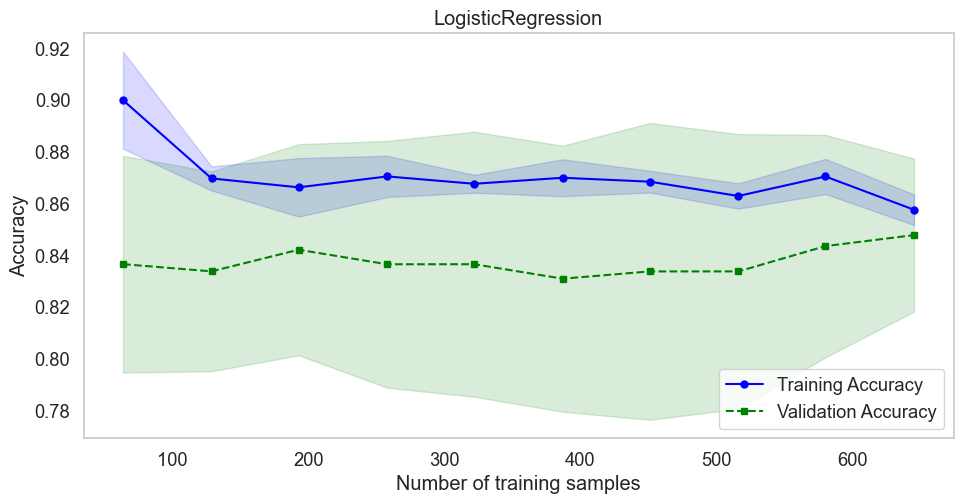

In [46]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('LogisticRegression')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


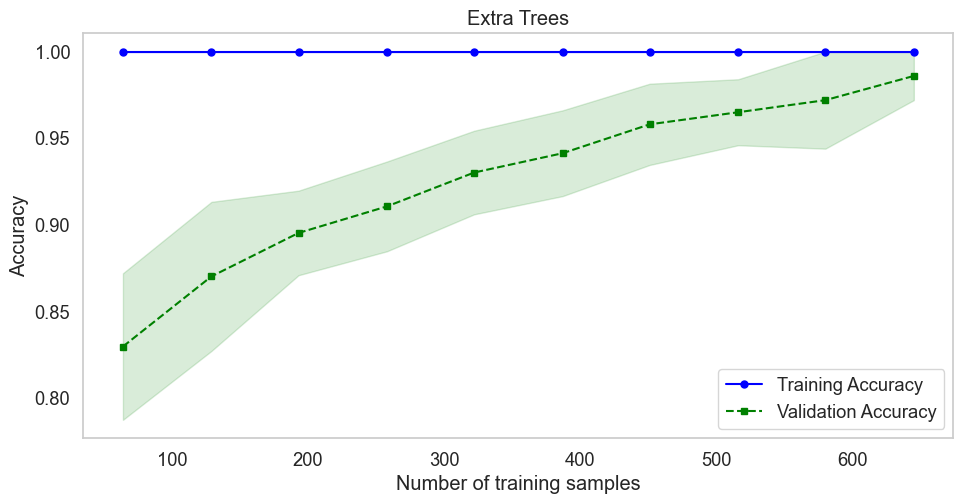

In [47]:
train_sizes, train_scores, test_scores = learning_curve(estimator=et,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('Extra Trees')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

it is observed that training accuracy for extra trees classifier is high.
i have change parameters for extra trees and the accuracy is not changing and remains high only
hence , it is overfitting 

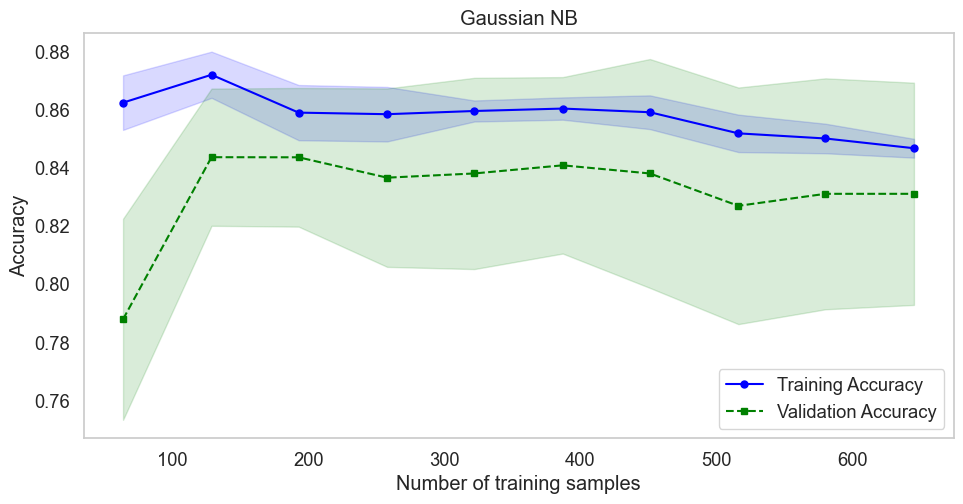

In [48]:

train_sizes, train_scores, test_scores = learning_curve(estimator=gnb,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('Gaussian NB')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

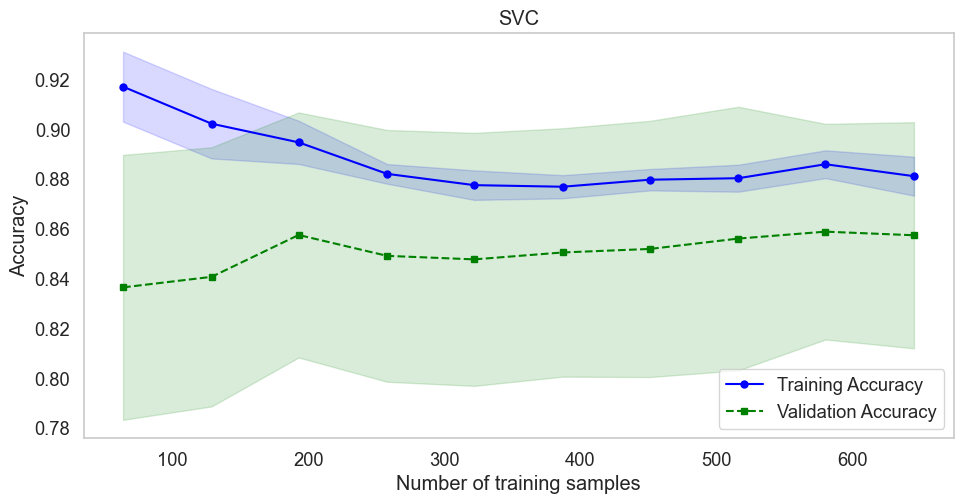

In [49]:

train_sizes, train_scores, test_scores = learning_curve(estimator=svc,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('SVC')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()